In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
N = 1000

# Згенеруємо випадкові дані для прикладу
angl = np.random.rand(N, 1) * 2 * np.pi

X1 = 10 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y1 = 25 + 10 * np.cos(angl) * np.random.rand(N, 1)

angl = np.random.rand(N, 1) * 2 * np.pi

X2 = 3 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y2 = 0 + 8 * np.cos(angl) * np.random.rand(N, 1)

angl = np.random.rand(N, 1) * 2 * np.pi

X3 = 20 + 10 * np.sin(angl) * np.random.rand(N, 1)
Y3 = -15 + 10 * np.cos(angl) * np.random.rand(N, 1)

X = np.concatenate((X1, X2, X3))
Y = np.concatenate((Y1, Y2, Y3))


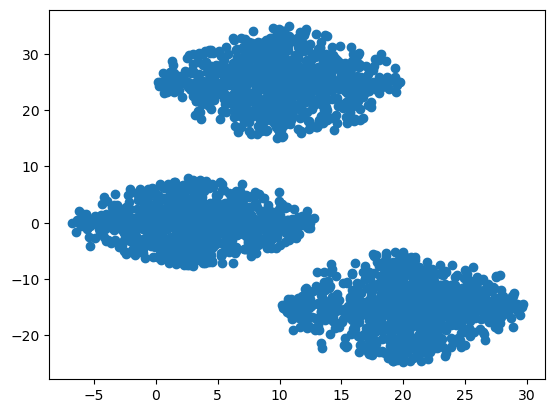

In [3]:
plt.scatter(X, Y)
plt.show()

In [4]:
def plot(A, centroids, k):
    c = ['r', 'g', 'b']
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor, line_width=2, point_size=0, line_style='solid')
    
    for i in range(k):
        plt.scatter(M[:,0] * A[i] , M[:,1] * A[i], color =c[i])
    plt.scatter(centroids[:,0] , centroids[:,1], color ='black', s = 200)
    plt.scatter([0] , [0], color ='white')
    plt.show()

In [5]:
k = 3
p = 0
M = np.asarray([X,Y]).T.reshape(k * N,2)
centroids = np.array([M[random.randint(0, 3 * N)], M[random.randint(0, 3 * N)], M[random.randint(0, 3 * N)]])
max_iter = 5
def f(A, B, C):
    return ((A <= B)*1 + (A <= C)*1) == 2

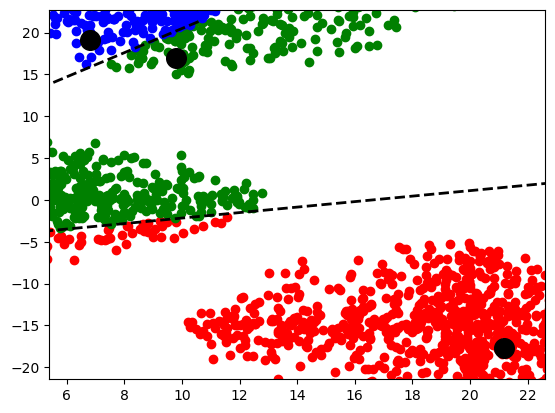

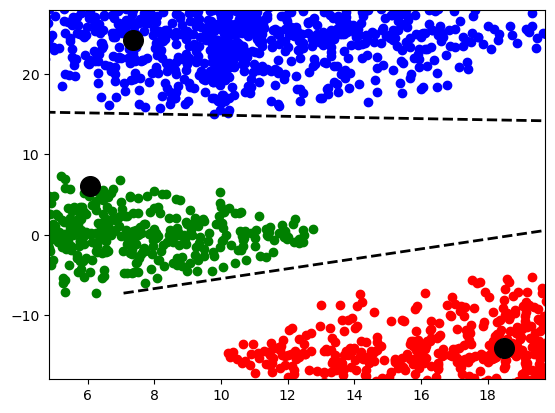

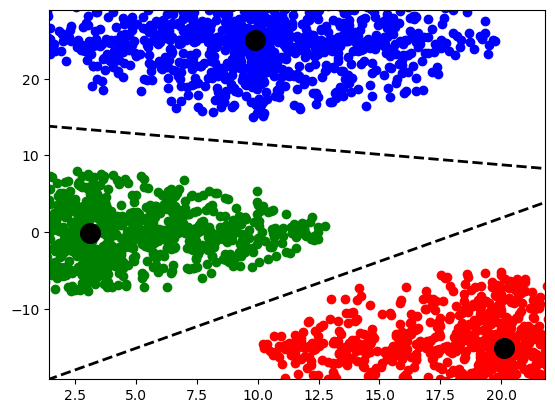

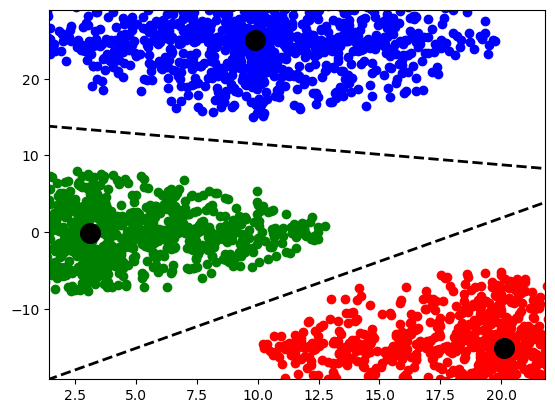

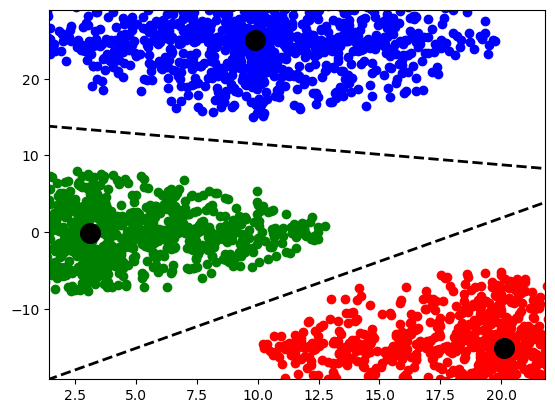

In [6]:
while True:
    dist = ((M - centroids[0]) ** 2)
    for i in range(k - 1):
        dist0 = ((M - centroids[i + 1]) ** 2)
        dist = np.concatenate((dist, dist0))
    
    dist = dist.reshape(k, k * N, 2)
    dist = dist.sum(axis = 2)
    A = f(dist[0], dist[1], dist[2])
    for i in range(1, k):
        A = np.concatenate((A, f(dist[i%k], dist[(i+1)%k], dist[(i+2)%k])))
    A = A.reshape(k, k * N)
    plot(A, centroids, k)
    centroids = np.dot(A, M)
    A1 = A.sum(axis = 1)
    for i in range(k):
        centroids[i] = centroids[i] / A1[i]
    
    p+=1
    if p > max_iter - 1:
        break